In [180]:
glb_cnt = 2

In [ ]:
%%capture
!pip3 install fastcluster

In [ ]:
%%capture
!pip3 install seaborn

In [36]:
!pip3 install rake-nltk

In [37]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import wordnet



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [39]:
import yake

In [5]:
pip install git+https://github.com/LIAAD/yake


  Cloning https://github.com/LIAAD/yake to /tmp/pip-req-build-zc2y_8km
  Running command git clone -q https://github.com/LIAAD/yake /tmp/pip-req-build-zc2y_8km
     |████████████████████████████████| 92kB 4.3MB/s 
  Created wheel for yake: filename=yake-0.4.8-py2.py3-none-any.whl size=60161 sha256=7032934d8faa67e7100f78f5598ff0449bdf33c57d15e4868012c255552050d6
  Stored in directory: /tmp/pip-ephem-wheel-cache-wthzsxok/wheels/be/35/27/e4ebd54b78c1806ed8b0271ce247fcd91e2bedde35889fbc9b
  Created wheel for segtok: filename=segtok-1.5.10-cp37-none-any.whl size=25019 sha256=f8db0e40a824ccb44d830026beea19bc5f7d25646ab95dce893d88231b01aaf0
  Stored in directory: /root/.cache/pip/wheels/b4/39/f6/9ca1c5cabde964d728023b5751c3a206a5c8cc40252321fb6b
Successfully built yake segtok


In [6]:
!python -m spacy download en_core_web_lg

     |████████████████████████████████| 827.9MB 1.1MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.2.5-cp37-none-any.whl size=829180944 sha256=97cd13beaccb527399c514d7e7e442743aad39b7ced5fcbbab62a63d230441da
  Stored in directory: /tmp/pip-ephem-wheel-cache-bl8z1t1r/wheels/2a/c1/a6/fc7a877b1efca9bc6a089d6f506f16d3868408f9ff89f8dbfc
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [13]:
#@title Load the Universal Sentence Encoder's TF Hub module
from absl import logging

import tensorflow as tf

import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns

module_url = "https://tfhub.dev/google/universal-sentence-encoder-large/5" #@param ["https://tfhub.dev/google/universal-sentence-encoder/4", "https://tfhub.dev/google/universal-sentence-encoder-large/5"]
model = hub.load(module_url)
print ("module %s loaded" % module_url)
def embed(input):
  return model(input)

module https://tfhub.dev/google/universal-sentence-encoder-large/5 loaded


In [14]:
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
from matplotlib import pyplot as plt
import math

In [15]:
#PDF Texts
from google.colab import files
upload = files.upload()

In [1]:
from sklearn import metrics
#data_url = 'https://raw.githubusercontent.com/Araz1103/cluster_data/main/questions_cleaned_final.csv?token=AKN3YYILCX3G4BYI4RBJKR3AWX6K2'
test_txt = open('test_fess104.txt','r')
#test_txt = open('test_fess101.txt','r')
#test_txt = open('test_geo.txt','r')
#test_txt = open('grade6_sciencech4.txt','r')
#test_txt = open('grade8_sciencech7.txt','r')



In [2]:

tst_str = test_txt.read()
tst_str



'Mary in the library\nAs the bell rang, the teacher asked the students to follow\nhim, because they were going to the library for the first\ntime. When Mary stepped inside, she found that the\nlibrary was much larger than their classroom. And there\nwere so many shelves, all full of books. In one corner\nwas a cupboard filled with large, old volumes. Seeing\nher trying to open the cupboard, the teacher said, “That\ncupboard has very special books on different religions.\nDid you know that we have a set of the Vedas?”\nWhat are the Vedas? Mary wondered. Let us find out\nOne of the oldest books in the world\nYou may have heard about the Vedas. There are\nfour of them – the Rigveda, Samaveda, Yajurveda\nand Atharvaveda. The oldest Veda is the Rigveda,\ncomposed about 3500 years ago. The Rigveda\nincludes more than a thousand hymns, called\nsukta or “well-said”. These hymns are in praise\nof various gods and goddesses. Three gods are\nespecially important: Agni, the god of fire; Indra,\na 

In [3]:
tst_str = tst_str.replace('i.e.','therefore').replace(".”","”.").replace(".’","’.").replace("?”","”?").replace("?’","’?").replace("?","?#$")

In [4]:
tst_str

'Mary in the library\nAs the bell rang, the teacher asked the students to follow\nhim, because they were going to the library for the first\ntime. When Mary stepped inside, she found that the\nlibrary was much larger than their classroom. And there\nwere so many shelves, all full of books. In one corner\nwas a cupboard filled with large, old volumes. Seeing\nher trying to open the cupboard, the teacher said, “That\ncupboard has very special books on different religions.\nDid you know that we have a set of the Vedas”?#$\nWhat are the Vedas?#$ Mary wondered. Let us find out\nOne of the oldest books in the world\nYou may have heard about the Vedas. There are\nfour of them – the Rigveda, Samaveda, Yajurveda\nand Atharvaveda. The oldest Veda is the Rigveda,\ncomposed about 3500 years ago. The Rigveda\nincludes more than a thousand hymns, called\nsukta or “well-said”. These hymns are in praise\nof various gods and goddesses. Three gods are\nespecially important: Agni, the god of fire; Indra,

In [5]:
import re
tst_L = re.split('[.|#$]',tst_str)


In [6]:
len(tst_L)

175

In [7]:
final_L = []
for i in range(len(tst_L)):
  #print(i)
  tst_L[i] = tst_L[i].replace('\n',' ').replace('\t',' ').replace('  ',' ')
  if(tst_L[i].isspace() or len(tst_L[i])==0):
    #print('This is deleted',tst_L[i])
    pass
  else:
    final_L.append(tst_L[i])

In [8]:
final_L = list(set(final_L))

In [9]:
len(final_L)

159

Course and Number of Questions to test with USE

In [10]:
data_used_for_demo = final_L.copy()

In [11]:
data_used_for_demo

[' Offerings could include ghee, grain, and in some cases, animals',
 ' They also suggest that the sage lived in a society where horses and cows were valued animals',
 ' Sanskrit and other languages Sanskrit is part of a family of languages known as Indo-European',
 ' While some megaliths can be seen on the surface, other megalithic burials are often underground',
 ' One man was found buried in a large, four legged clay jar in the courtyard of a five-roomed house (one of the largest houses at the site), in the centre of the settlement',
 ' It is a site on the river Ghod, a tributary of the Bhima',
 ' This is a much larger number than the 200 bones that are recognised in modern anatomy',
 ' Vessels that probably contained food and water were placed with the dead',
 ' List the languages you have heard about and try and identify the families to which they belong',
 ' The bones were then put into the fire, and they cracked because of the heat',
 ' The practice of erecting megaliths began a

In [16]:
data_embeddings = embed(data_used_for_demo)

## TF-IDF Fill in the Blanks

In [17]:
# Word2Vec
import spacy
nlp = spacy.load("en_core_web_lg")

In [18]:
#Checking Optimal K-Value
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering

n_clus = [i for i in range(4,11)]
scores = []

for k in n_clus:
    cluster = AgglomerativeClustering(k, affinity = 'euclidean', linkage = 'ward')
    q_clusters = cluster.fit_predict(data_embeddings)
    scores.append([k, metrics.silhouette_score(data_embeddings, q_clusters, metric='euclidean')])

print(scores)
best_score = sorted(scores, key = lambda x: x[1], reverse = True)[0][0]
print("Optimal Cluster Number with silhoutte score is:",best_score)


[[4, 0.039252557], [5, 0.036272567], [6, 0.039764453], [7, 0.031830795], [8, 0.03659603], [9, 0.031891547], [10, 0.03216068]]
Optimal Cluster Number with silhoutte score is: 6


Cluster Sizes are: [37, 32, 26, 26, 14, 24]


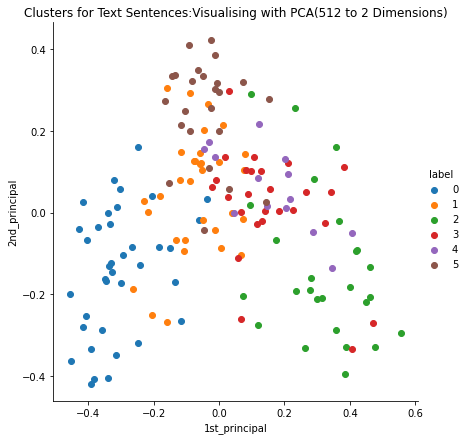

In [19]:
import pandas as pd
n_clus = best_score
#n_clus = 6
cluster = AgglomerativeClustering(n_clus, affinity = 'euclidean', linkage = 'ward')
q_clusters = cluster.fit_predict(data_embeddings)
word_vecs = np.array(data_embeddings)
grouped = {}
for i in range(n_clus):
    grouped[i] = []

#print(q_clusters)
for i in range(len(q_clusters)):
    #print(i)
    #print(q_clusters[i])
    #print(grouped[q_clusters[i]])
    grouped[q_clusters[i]].append(data_used_for_demo[i])    

cluster_lens = [len(grouped[i]) for i in grouped.keys()]

print('Cluster Sizes are:', cluster_lens)

from sklearn import decomposition
pca = decomposition.PCA()

pca.n_components = 2
pca_data = pca.fit_transform(word_vecs)

import seaborn as sn
import matplotlib.pyplot as plt

pca_df = pd.DataFrame(data = pca_data, columns = ('1st_principal', '2nd_principal'))
pca_df['label'] = q_clusters
sn.FacetGrid(pca_df,hue = 'label', height = 6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.title('Clusters for Text Sentences:Visualising with PCA(512 to 2 Dimensions)')
#plt.savefig("init_op_"+str(glb_cnt)+".png")
plt.show()



In [20]:
print('Cluster Sizes are:', cluster_lens)
for i in range(n_clus):
  display(grouped[i])
  print("Cluster",i)

Cluster Sizes are: [37, 32, 26, 26, 14, 24]


[' While some megaliths can be seen on the surface, other megalithic burials are often underground',
 ' One man was found buried in a large, four legged clay jar in the courtyard of a five-roomed house (one of the largest houses at the site), in the centre of the settlement',
 ' This is a much larger number than the 200 bones that are recognised in modern anatomy',
 ' Vessels that probably contained food and water were placed with the dead',
 ' The bones were then put into the fire, and they cracked because of the heat',
 ' Generally, the dead were buried with distinctive pots, which are called Black and Red Ware',
 ' Bones of a number of animals, many bearing cut marks that show they may have been used as food, have also been found',
 ' Stone circles or boulders placed on the surface probably served as signposts to find the burial site, so that people could return to the same place whenever they wanted to',
 ' These finds suggest that there was some difference in status amongst the pe

Cluster 0


[' Offerings could include ghee, grain, and in some cases, animals',
 ' Several vish or jana are mentioned by name',
 ' The word vaishya comes from vish',
 ' The books we use are written and printed',
 ' Some important megalithic sites are shown on Map 2 (page13)',
 ' How do you think he found out about the human body in such great detail?',
 ' Seeing her trying to open the cupboard, the teacher said, “That cupboard has very special books on different religions',
 ' When Mary stepped inside, she found that the library was much larger than their classroom',
 ' The other was vish',
 ' Generally, sons did not automatically succeed fathers as rajas',
 ' Would they have sons?',
 ' The hip or the pelvic area of women is generally larger to enable child bearing',
 ' In one corner was a cupboard filled with large, old volumes',
 ' Let us look at some of these',
 ' So we find reference to the Puru jana or vish, the Bharata jana or vish, the Yadu jana or vish, and so on',
 ' However, there are p

Cluster 1


[' The practice of erecting megaliths began about 3000 years ago, and was prevalent throughout the Deccan, south India, in the north-east and Kashmir',
 ' Let us find out One of the oldest books in the world You may have heard about the Vedas',
 ' The Rigveda was recited and heard rather than read',
 ' These hymns were composed by sages (rishis)',
 ' It is now preserved in a library in Pune, Maharashtra',
 ' The oldest Veda is the Rigveda, composed about 3500 years ago',
 ' It was written down several centuries after it was first composed, and printed less than 200 years ago',
 ' There are four of them – the Rigveda, Samaveda, Yajurveda and Atharvaveda',
 ' While the Rigveda was being composed in the north-west of the subcontinent, there were other developments elsewhere',
 ' Let us see how they study the Rigveda',
 ' What are the Vedas?',
 ' The Rigveda is in old or Vedic Sanskrit, which is different from the Sanskrit you learn in school these days',
 ' The Rigveda includes more than 

Cluster 2


[' It is a site on the river Ghod, a tributary of the Bhima',
 ' Vishvamitra: O sisters, please listen to me, the singer who has come from a distance with his chariots and carts',
 ' Cattle, horses and chariots There are many prayers in the Rigveda for cattle, children (especially sons), and horses',
 ' Let your waters not rise above our axles, so that we can cross safely',
 ' Elsewhere Find China in your atlas',
 ' You move like chariots to the sea, through the power of Indra',
 ' Other rivers, especially the Indus and its other tributaries, and the Sarasvati, are also named in the hymns',
 ' Once we start flowing, we cannot be stopped',
 ' Historians point out that this hymn was composed in the area where these rivers flow',
 ' Look at Map 1 (page 2) and list 5 rivers that are not mentioned in the Rigveda',
 ' The Ganga and Yamuna are named only once',
 ' You will learn more about this in Chapter 5',
 ' Give reasons for your answer',
 ' You are full of water and wish to unite with on

Cluster 3


[' Sanskrit and other languages Sanskrit is part of a family of languages known as Indo-European',
 ' List the languages you have heard about and try and identify the families to which they belong',
 ' They are called a family because they originally had words in common',
 ' Some Indian languages such as Assamese, Gujarati, Hindi, Kashmiri and Sindhi; Asian languages such as Persian and many European languages such as English, French, German, Greek, Italian and Spanish belong to this family',
 ' For instance, those used in the north-east belong to the Tibeto-Burman family; Tamil, Telugu, Kannada and Malayalam belong to the Dravidian family; and the languages spoken in Jharkhand and parts of central India belong to the Austro-Asiatic family',
 ' Sometimes, the people who composed the hymns described themselves as Aryas and called their opponents Dasas or Dasyus',
 ' There are two groups who are described in terms of their work — the priests, sometimes called brahmins, who performed vari

Cluster 4


[' They also suggest that the sage lived in a society where horses and cows were valued animals',
 ' Often, men also wore ornaments',
 ' Some battles were fought for water, and to capture people',
 ' Some wealth was used for the performance of yajnas or sacrifices in which offerings were made into the fire',
 ' There were several things that people did to make megaliths',
 ' This house also had a granary',
 ' Do you think chariots were also important?',
 ' Battles were also fought for land, which was important for pasture, and for growing hardy crops that ripened quickly, such as barley',
 ' There was no regular army, but there were assemblies where people met and discussed matters of war and peace',
 ' Some of the wealth that was obtained was kept by the leaders, some was given to the priests and the rest was distributed amongst the people',
 ' They were treated as the property of their owners, who could make them do whatever work they wanted',
 ' These were people who did not perform

Cluster 5


### RAKE & YAKE Keyword Extraction TEST

In [21]:
#RAKE
from rake_nltk import Rake
r = Rake()
r.extract_keywords_from_sentences(grouped[2])
r.get_ranked_phrases_with_scores()

[(15.0, 'famous physician named charaka'),
 (13.785714285714285, 'around 3500 years ago'),
 (9.785714285714285, '3500 years ago'),
 (9.285714285714285, '3000 years ago'),
 (9.285714285714285, '2700 years ago'),
 (9.285714285714285, '2000 years ago'),
 (9.285714285714285, '200 years ago'),
 (9.285714285714285, '150 years ago'),
 (9.0, 'let us see'),
 (9.0, 'erecting megaliths began'),
 (8.5, 'earliest printed texts'),
 (8.0, 'list one difference'),
 (8.0, 'let us find'),
 (8.0, 'examine written sources'),
 (8.0, 'describe people found'),
 (5.0, 'charaka samhita'),
 (4.5, 'printed less'),
 (4.0, 'special drink'),
 (4.0, 'south india'),
 (4.0, 'several centuries'),
 (4.0, 'said ”'),
 (4.0, 'prevalent throughout'),
 (4.0, 'prepare one'),
 (4.0, 'oldest veda'),
 (4.0, 'oldest books'),
 (4.0, 'medicine known'),
 (4.0, 'material remains'),
 (4.0, 'like archaeologists'),
 (4.0, 'first evidence'),
 (4.0, 'especially important'),
 (4.0, 'english translation'),
 (4.0, 'developments elsewhere'),
 

In [22]:
#YAKE
import yake
kw_extractor = yake.KeywordExtractor()
test_sent = grouped[2][0]
for i in grouped[2][1:]:
  if(i[-1]=='?'):
    test_sent+= i
  else:
    test_sent+= '.'
    test_sent+=i
print(test_sent)
keywords = kw_extractor.extract_keywords(test_sent)
print(keywords)
for kw in keywords:
  print(kw)

 The practice of erecting megaliths began about 3000 years ago, and was prevalent throughout the Deccan, south India, in the north-east and Kashmir. Let us find out One of the oldest books in the world You may have heard about the Vedas. The Rigveda was recited and heard rather than read. These hymns were composed by sages (rishis). It is now preserved in a library in Pune, Maharashtra. The oldest Veda is the Rigveda, composed about 3500 years ago. It was written down several centuries after it was first composed, and printed less than 200 years ago. There are four of them – the Rigveda, Samaveda, Yajurveda and Atharvaveda. While the Rigveda was being composed in the north-west of the subcontinent, there were other developments elsewhere. Let us see how they study the Rigveda What are the Vedas?. The Rigveda is in old or Vedic Sanskrit, which is different from the Sanskrit you learn in school these days. The Rigveda includes more than a thousand hymns, called sukta or “well-said”. Some

### CUSTOM ALGORITHM BASED ON TF-IDF
1. Filter Stop Words, Verbs, Adjectives, Adverbs & related
2. Create Corpus of List of words per cluster
3. Implement TF-IDF Scoring
4. Filter out Top Keywords
5. Randomly take 50% for each cluster
6. Generate Fill in the Blanks
7. Filter for UI based on User Input
8. Generate options 
9. For Blank Keyword, get replacement from other clusters
10. Ready!

In [23]:
# Finding Keywords for Fill in the Blanks
# Using Data : Removed Stop Words and Lemmatization
custom_stop_words = ['TABLE', 'OBSERVATIONS', 'ACTIVITY', 'ILLUSTRATION', 'FIG', 'FIGURE', 'YEARS', 'MAP', 'CHAPTER', 'SECTION', 'DIAGRAM', 'EXAMPLES', 'OBJECTS', 'GROUPS']
new_data2 = []
for clus in grouped:
  clus_list = []
  for sent in grouped[clus]:
          temp_lst = []
          tokens = nlp(sent)
          #print(list(tokens))
          for token in tokens:
              if(not token.is_punct and not token.is_stop and token.lemma_ != ' '):
                if(token.pos_=='VERB' or token.pos_=='ADJ' or token.pos_ == 'ADV' or token.pos_ == 'ADP' or token.pos_ == 'PRON' or token.pos_ == 'AUX' or token.pos_ == 'CONJ' or token.pos_ == 'DET'):
                  #print(token)
                  pass
                else:
                  if(len(token.text)>2 and (token.text.upper() not in custom_stop_words) and (not token.text.isspace())):
                    temp_lst.append(token.text.upper())
          if(len(temp_lst)):
            clus_list.append(temp_lst)
  new_data2.append(clus_list)

In [24]:
new_data2

[[['MEGALITHS', 'SURFACE', 'BURIALS'],
  ['MAN',
   'CLAY',
   'JAR',
   'COURTYARD',
   'HOUSE',
   'HOUSES',
   'SITE',
   'CENTRE',
   'SETTLEMENT'],
  ['NUMBER', '200', 'BONES', 'ANATOMY'],
  ['VESSELS', 'FOOD', 'WATER'],
  ['BONES', 'FIRE', 'HEAT'],
  ['POTS', 'BLACK', 'RED', 'WARE'],
  ['BONES', 'NUMBER', 'ANIMALS', 'BEARING', 'CUT', 'MARKS', 'FOOD'],
  ['STONE',
   'CIRCLES',
   'BOULDERS',
   'SURFACE',
   'SIGNPOSTS',
   'BURIAL',
   'SITE',
   'PEOPLE',
   'PLACE'],
  ['FINDS', 'DIFFERENCE', 'STATUS', 'PEOPLE'],
  ['PEOPLE', 'BURIAL', 'SITES'],
  ['CHARAKA', 'TEETH', 'JOINTS', 'CARTILAGE'],
  ['PEOPLE', 'FAMILY', 'PLACE', 'TIME'],
  ['ADULTS', 'GROUND', 'HEAD', 'NORTH'],
  ['ORACLE', 'BONES', 'FUTURE'],
  ['STUDIES', 'SKELETON', 'CHILD', 'SIZE'],
  ['BURIALS', 'HOUSES'],
  ['STONE', 'BOULDERS', 'MEGALITHS', 'STONES'],
  ['TOOLS',
   'WEAPONS',
   'IRON',
   'SKELETONS',
   'HORSES',
   'HORSE',
   'EQUIPMENT',
   'ORNAMENTS',
   'STONE',
   'GOLD'],
  ['BODIES', 'GRAVE', 'POR

In [25]:
def tf(term, doc):
    #doc is a list of terms
    cnt = doc.count(term)
    doc_dic = {i: doc.count(i) for  i in set(doc)}
    max_w = max(doc_dic.values())
    #tf_val = 0.5 + (0.5*cnt/max_w)
    tf_val = (cnt/max_w)
    return tf_val

In [26]:
def idf(term, corpus):
    #corpus list of lists of terms
    c = len(corpus) #Number of docs
    doc_cnt = 0
    for doc in corpus:
        if(term in doc):
            doc_cnt+=1
    return math.log((c/doc_cnt), 10)

In [27]:
def Get_Keywords(clus):
    corpus_list = [] #list of lists of clusters
    for docs in clus: #All clusters
      clus_list = []
      for doc in docs: #Sentence in that cluster
          clus_list.extend(doc)
      new_clus_list = list(set(clus_list))
      corpus_list.append(new_clus_list)
    #print(len(corpus_list))
    scores_list = []  #should contain all scores of words cluster wise
    for clus in corpus_list:
      clus_scores = []
      for word in clus:
              
              #print(doc)
              #print(token, tf(token.text, doc))
              clus_scores.append((word,tf(word, clus)*idf(word, corpus_list)))
      clus_scores.sort(key = lambda x: x[1], reverse = True)
      scores_list.append(clus_scores)

      
      
    return scores_list
            
    
    
    

In [28]:
tst_scores = Get_Keywords(new_data2)


In [29]:
len(tst_scores)

6

In [30]:
tst_scores

[[('BURIALS', 0.7781512503836435),
  ('STONE', 0.7781512503836435),
  ('RED', 0.7781512503836435),
  ('BANGLES', 0.7781512503836435),
  ('GOLD', 0.7781512503836435),
  ('BODIES', 0.7781512503836435),
  ('FUTURE', 0.7781512503836435),
  ('SIGNPOSTS', 0.7781512503836435),
  ('CENTRE', 0.7781512503836435),
  ('COURTYARD', 0.7781512503836435),
  ('BEADS', 0.7781512503836435),
  ('DISTINCTIONS', 0.7781512503836435),
  ('STRUCTURE', 0.7781512503836435),
  ('HEAT', 0.7781512503836435),
  ('PITS', 0.7781512503836435),
  ('CIRCLE', 0.7781512503836435),
  ('HEAD', 0.7781512503836435),
  ('TOOLS', 0.7781512503836435),
  ('FINDS', 0.7781512503836435),
  ('BLACK', 0.7781512503836435),
  ('CUT', 0.7781512503836435),
  ('STUDIES', 0.7781512503836435),
  ('BASIS', 0.7781512503836435),
  ('360', 0.7781512503836435),
  ('BONE', 0.7781512503836435),
  ('WAY', 0.7781512503836435),
  ('FEATURES', 0.7781512503836435),
  ('PERSON', 0.7781512503836435),
  ('MAN', 0.7781512503836435),
  ('SHELL', 0.77815125038

In [31]:
final_scores = []
for clus in tst_scores:
  if(len(clus)):
    high = clus[0][1]
    stop = 0
    for i in range(len(clus)):
      if(clus[i][1]!=high):
        stop = i-1
        break
    final_scores.append(clus[:stop+1])
  else:
    final_scores.append([])



In [41]:
import random
def get_top_keywords(final_scores):
  final_keys = []
  for i in range(len(final_scores)):
    if(len(final_scores[i]) > 4):
      clus_len = len(final_scores[i])
      clus_random = random.sample(final_scores[i], clus_len//4)
      clus_random = [word[0] for word in clus_random]
      final_keys.append(clus_random)
    else:
      clus_random = [word[0] for word in final_scores[i]]
      final_keys.append(clus_random)
  return final_keys


fill_keys = get_top_keywords(final_scores)


In [42]:
len(fill_keys)

6

In [43]:
def gen_fill_in_blanks(fill_keys, clusters):
  final_fill_in_blanks = []
  for i in range(len(clusters)):
    print('_____________')
    print('Cluster:',i+1)
    final_clus = []
    for sent in clusters[i]:
      for word in fill_keys[i]:
        if(word in sent.upper().split()):
          print('Original:', sent.upper())
          #print(word)
          print('Fill in the Blank:', sent.upper().replace(word, ' _______ '))
          to_keep = int(input('Do you want to keep this question? 1 for yes 0 for no'))
          if(to_keep):
            options = []
            antonyms = []
            
            kw_extractor = yake.KeywordExtractor()
            test_sent = grouped[i][0]
            for j in grouped[i][1:]:
              if(j[-1]=='?'):
                test_sent+= j
              else:
                test_sent+= '.'
                test_sent+=j
            #print(test_sent)
            keywords = kw_extractor.extract_keywords(test_sent)
            #print(keywords)
            for syn in wordnet.synsets(word):
                    for l in syn.lemmas():
                          #synonyms.append(l.name())
                          if l.antonyms():
                              antonyms.append(l.antonyms()[0].name().upper())
            if(len(antonyms)):
              options.append(antonyms[0])
              key_ops = [w[0].upper() for w in random.sample(keywords, 4)]
              cnt = 0
              for i in range(len(key_ops)):
                if(key_ops[i]!= word and (word not in key_ops[i])):
                  options.append(key_ops[i])
                  cnt+=1
                if(cnt==2):
                  break
            elif(word.isnumeric()):
              ops = [str(int(word)+50),str(int(word)+100),str(int(word)-10),str(int(word)-50)]
              options.extend(ops)
            else:
              key_ops = [w[0].upper() for w in random.sample(keywords, 5)]
              cnt = 0
              for i in range(len(key_ops)):
                if(key_ops[i]!= word and (word not in key_ops[i])):
                  options.append(key_ops[i])
                  cnt+=1
                if(cnt==3):
                  break
            

            options.append(word)

            final_clus.append([sent.upper().replace(word, '_______'), options, i]) #Sent, Keyword, Cluster #num
            #print(final_clus)
          print('---------------')
    final_fill_in_blanks.append(final_clus)
  return final_fill_in_blanks


In [ ]:
final_fill_in_banks = gen_fill_in_blanks(fill_keys, grouped)

_____________
Cluster: 1
Original:  ONE MAN WAS FOUND BURIED IN A LARGE, FOUR LEGGED CLAY JAR IN THE COURTYARD OF A FIVE-ROOMED HOUSE (ONE OF THE LARGEST HOUSES AT THE SITE), IN THE CENTRE OF THE SETTLEMENT
Fill in the Blank:  ONE  _______  WAS FOUND BURIED IN A LARGE, FOUR LEGGED CLAY JAR IN THE COURTYARD OF A FIVE-ROOMED HOUSE (ONE OF THE LARGEST HOUSES AT THE SITE), IN THE CENTRE OF THE SETTLEMENT
Do you want to keep this question? 1 for yes 0 for no0
---------------
Original:  ONE MAN WAS FOUND BURIED IN A LARGE, FOUR LEGGED CLAY JAR IN THE COURTYARD OF A FIVE-ROOMED HOUSE (ONE OF THE LARGEST HOUSES AT THE SITE), IN THE CENTRE OF THE SETTLEMENT
Fill in the Blank:  ONE MAN WAS FOUND BURIED IN A LARGE, FOUR LEGGED CLAY  _______  IN THE COURTYARD OF A FIVE-ROOMED HOUSE (ONE OF THE LARGEST HOUSES AT THE SITE), IN THE CENTRE OF THE SETTLEMENT
Do you want to keep this question? 1 for yes 0 for no1
---------------
Original:  ONE MAN WAS FOUND BURIED IN A LARGE, FOUR LEGGED CLAY JAR IN THE

In [313]:
final_fill_in_banks

[[[' HE TELLS THEM THAT IT TAKES 17 FULL GROWN TREES TO MAKE ONE _______ OF PAPER',
   ['FORESTS', 'FUTURE', 'FUTURE GENERATIONS', 'TONNE'],
   2]],
 [[' THE PACHMARHI BIOSPHERE RESERVE CONSISTS OF ONE NATIONAL PARK NAMED SATPURA AND TWO WILDLIFE _______ NAMED BORI AND   PACHMARHI (FIG',
   ['SATPURA TIGER RESERVE', 'NATIONAL PARK', 'RESERVE', 'SANCTUARIES'],
   2]],
 [[' BIRDS WHO COVER LONG _______ TO REACH ANOTHER LAND ARE KNOWN AS MIGRATORY BIRDS AS PAHELI LEARNT IN CLASS VII',
   ['GIANT', 'AREA', 'SQUIRREL', 'DISTANCES'],
   2]],
 [[' • MAKING FURNITURE OR USING _______ AS FUEL',
   ['TAWA RESERVOIR', 'KILL SNAKES', 'OWLS', 'WOOD'],
   2]],
 [],
 [],
 [[' GRADUALLY THE FERTILE LAND GETS CONVERTED INTO _______',
   ['HOLDING CAPACITY', 'DECREASE', 'GLOBAL WARMING', 'DESERTS'],
   2]],
 [[' THEY WERE TOLD BY PROFESSOR AHMAD THAT IF CUTTING OF TREES CONTINUES, RAINFALL AND THE _______ OF THE SOIL WILL DECREASE',
   ['INFERTILITY', 'ACT', 'AHMAD', 'FERTILITY'],
   1]]]

In [314]:
# Saving all OPs in a text file for future reference & baselining

save_op = open("QA_op_"+ str(glb_cnt) + ".txt", "w+")

#Writing Data Used for this Trial

#Course Used

save_op.write("Fill in the blanks Question with Options \n")

#Cluster Wise

for clus in final_fill_in_banks:
  if(len(clus)):
    for q in clus:
      save_op.write('Q: ' + q[0] + '\n')
      save_op.write('Options: \n')
      for opt in q[1]:
        save_op.write(opt + '\n') 
      save_op.write('Correct Answer: ' + q[1][-1] + '\n')
      save_op.write('------------- \n')

save_op.close()
glb_cnt+=1

In [ ]:
f

NameError: ignored